In [80]:
from sklearn.datasets import make_classification
import numpy as np

In [81]:
X,Y = make_classification(n_classes= 2, n_samples= 400,n_clusters_per_class=1, n_features= 2, n_informative=2,random_state= 3, n_redundant= 0)

In [82]:
from matplotlib import pyplot as plt

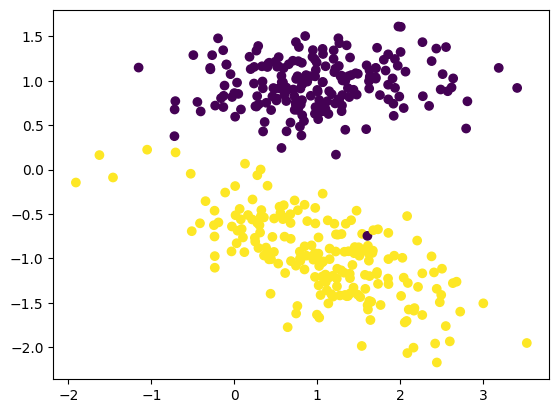

In [83]:
plt.scatter(X[:,0], X[:,1], c= Y)

In [102]:
class SVM:
    
    def __init__(self, C = 1.0):
        self.C = C
        self.w = 0
        self.b = 0
        
    def hingeloss(self, w, b, X, Y):
        loss = 0.0
        
        loss += .5*np.dot(w, w.T)
        
        m = X.shape[0]
        for i in range(m):
            ti = Y[i]*(np.dot(w, X[i].T) + b)
            loss += self.C * max(0, (1 - ti))
        
        return loss[0][0]
    
    def fit(self, X, Y , batch_size = 100, learning_rate = 0.001, maxItr = 300):
        
        no_of_feature = X.shape[1]
        no_of_samples = X.shape[0]
    
        n = learning_rate
        c = self.C
        
        #init the model parameters
        w = np.zeros((1, no_of_feature))
        b = 0
        
        
        
        #training from here...
        losses = []
    
        for i in range(maxItr):
        
            #training loop
            l = self.hingeloss(w,b,X,Y)
            losses.append(l)
            ids = np.arange(no_of_samples)
            np.random.shuffle(ids)

        
            #batch gradient descent with random shuffling
            for batch_start in range(0, no_of_samples, batch_size):
                gradw = 0
                gradb = 0
            
                #iterate over all example in mini batch
                for j in range(batch_start, batch_start+batch_size):
                
                    if j<no_of_samples:
                        i = ids[j]
                        ti = Y[i] * (np.dot(w,X[i].T)+ b) 
                
                        if ti>1:
                            gradw +=0
                            gradb +=0
                        else:
                            gradw += c*Y[i]*X[i]
                            gradb += c*Y[i]
                        
                # gradient for the bacth is ready ! now have to update w and b
                w = w - n*w + n*gradw
                b = b + n*gradb
            
        self.w = w
        self.b = b
        return w,b,losses

In [92]:
#conver y-label into (1,-1)
Y[Y==0] = -1 # broadcasting
print(Y)

[-1  1 -1  1 -1  1  1 -1 -1  1 -1  1  1 -1  1  1 -1 -1 -1  1  1  1  1 -1
 -1 -1  1  1  1 -1 -1  1 -1 -1 -1 -1 -1 -1  1  1  1 -1 -1  1  1 -1 -1 -1
  1  1 -1 -1  1  1 -1  1 -1  1  1  1 -1  1  1 -1 -1  1  1 -1 -1 -1 -1  1
  1 -1  1 -1  1 -1  1 -1 -1 -1 -1  1 -1 -1 -1 -1 -1 -1  1 -1  1 -1  1  1
 -1  1  1  1 -1 -1  1 -1  1 -1  1  1  1  1  1  1 -1  1  1 -1 -1  1  1 -1
  1  1 -1 -1 -1  1  1  1 -1 -1 -1  1 -1 -1 -1 -1 -1  1 -1  1  1  1 -1 -1
  1  1 -1 -1  1  1  1  1  1  1 -1  1 -1  1  1 -1  1  1  1  1 -1  1 -1  1
  1  1 -1  1  1  1 -1 -1 -1 -1  1 -1 -1 -1 -1 -1  1  1  1  1 -1  1  1 -1
 -1  1  1  1  1  1 -1 -1  1 -1  1 -1 -1  1  1  1 -1  1  1 -1 -1 -1  1  1
 -1  1  1  1 -1  1 -1  1 -1 -1 -1  1  1  1  1  1  1  1  1 -1 -1  1 -1  1
  1  1  1 -1  1  1 -1  1  1  1  1 -1  1  1 -1  1 -1 -1 -1 -1 -1  1 -1 -1
  1  1  1 -1 -1  1 -1 -1  1 -1 -1 -1 -1  1 -1  1 -1 -1 -1  1  1  1 -1  1
 -1  1 -1  1 -1  1  1  1 -1  1 -1 -1 -1 -1  1 -1 -1  1 -1 -1 -1 -1 -1  1
  1 -1  1  1 -1 -1 -1  1  1 -1 -1 -1 -1  1  1  1  1

In [103]:
mySVM = SVM()
w,b , losses = mySVM.fit(X,Y)
print(losses[0])
print(losses[-1])

400.0
14.504014707273349


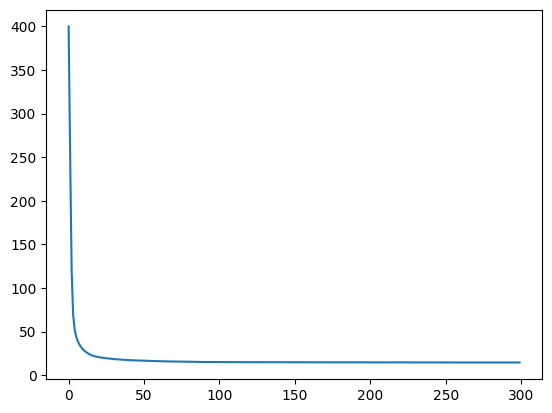

In [104]:
plt.plot(losses)

In [105]:
w, b = mySVM.w, mySVM.b
print(w,b)

[[-0.34698673 -2.09302581]] 0.4220000000000003


# Visualising Support Vector, Positive , Negative Parameters

In [106]:
def plotHyperplane(w1,w2,b):
    
    plt.figure(figsize=(12,12))
    x_1 = np.linspace(-2,4,10)
    x_2 = -(w1*x_1 + b)/w2
    
    x_p = -(w1*x_1 + b + 1)/w2 #wT + b = -1
    x_n = -(w1*x_1 + b -1)/w2 # wT + b = +1
    
    
    plt.plot(x_1,x_2 , label = 'Hyperplane wx+b = 0')
    plt.plot(x_1, x_p, label = '+ve hyperplane , wx+b =1')
    plt.plot(x_1,x_n, label = '-ve hyperplane , wx + b = -1')
    plt.legend()
    plt.scatter(X[:,0], X[:,1], c=Y)
    plt.show()

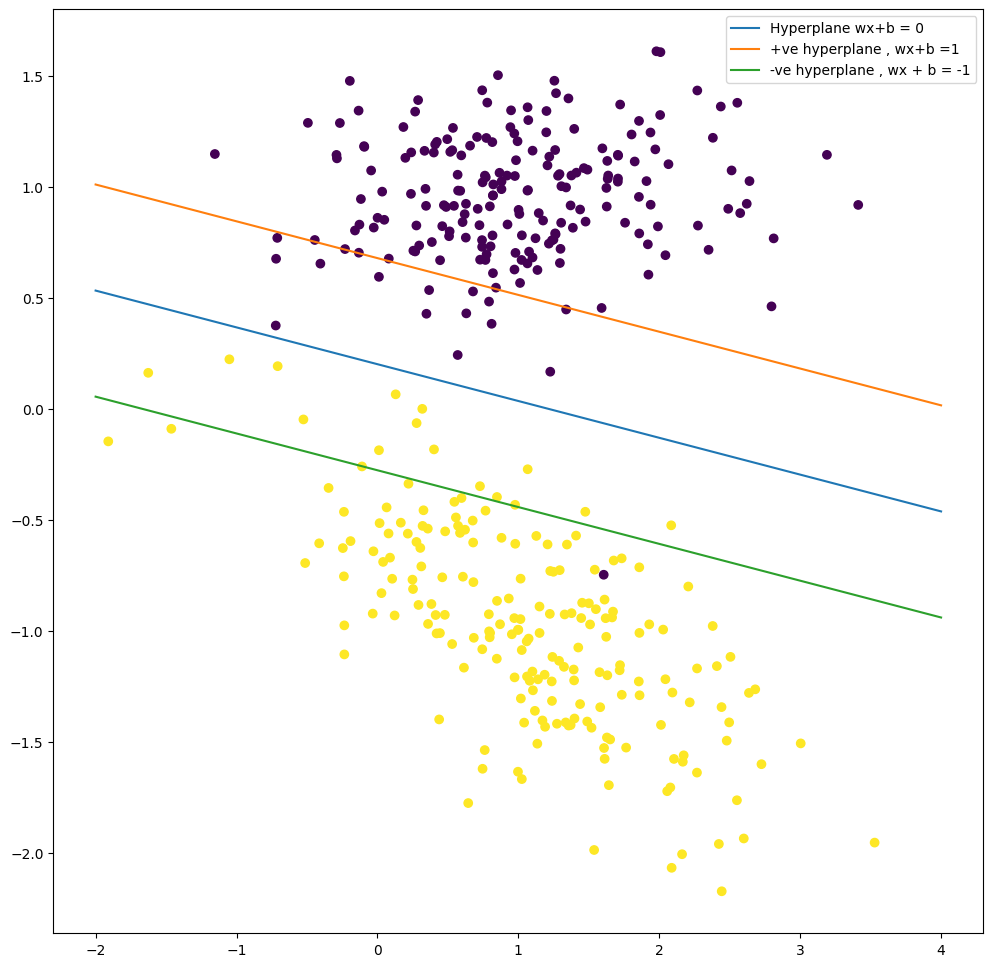

In [107]:
plotHyperplane(w[0,0], w[0,1],b)


In [111]:
# changing panelity 
mSVM = SVM(C = 1000.0)
w,b , losses = mSVM.fit(X,Y, maxItr=100)
print(losses[0])
print(losses[-1])

400000.0
21579.424770137568


In [112]:
w, b = mSVM.w, mSVM.b
print(w,b)

[[-10.53700087 -35.73198723]] 5.0


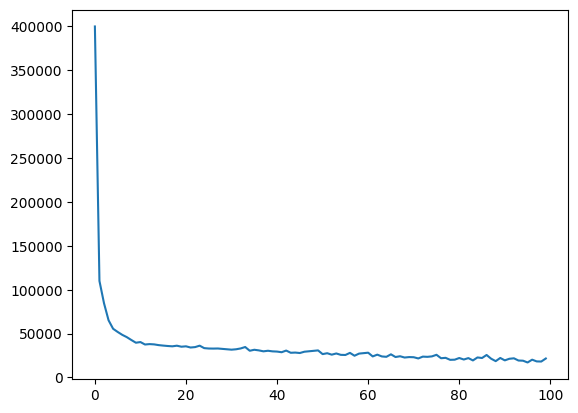

In [113]:
plt.plot(losses)

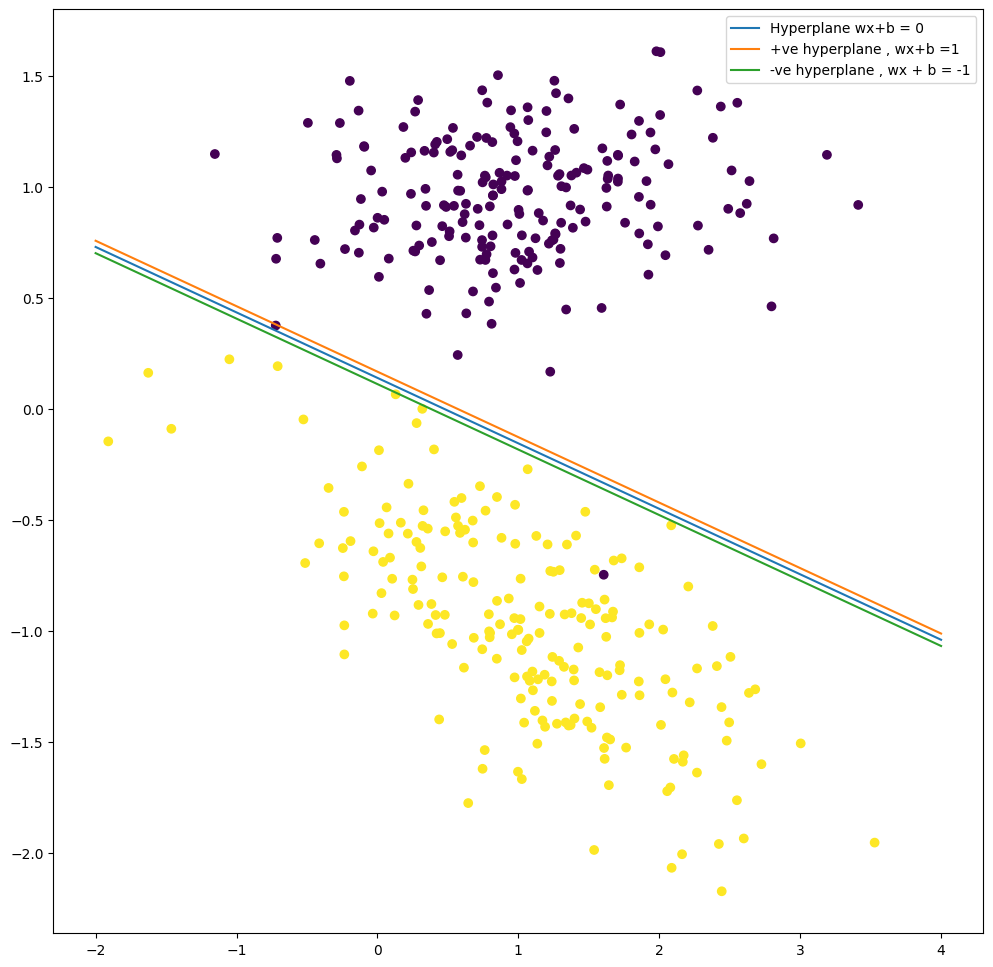

In [114]:
plotHyperplane(w[0,0], w[0,1],b)

#### as we increase the panelity the we try to classifiy the labels exact in the two of the class which cost the distance between the support vectors